In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [13]:
# 读取CSV文件
df1 = pd.read_csv('mlp_input_received_128.csv')
df2 = pd.read_csv('mlp_input_received_256.csv')
df3 = pd.read_csv('mlp_input_received_512.csv')
df4 = pd.read_csv('mlp_input_received_1024.csv')
df5 = pd.read_csv('mlp_input_received_2048.csv')
df6 = pd.read_csv('mlp_input_received_4096.csv')
df7 = pd.read_csv('mlp_input_received_8192.csv')
df8 = pd.read_csv('cnn_input_received_128.csv')
df9 = pd.read_csv('cnn_input_received_256.csv')
df10 = pd.read_csv('cnn_input_received_512.csv')
df11 = pd.read_csv('cnn_input_received_1024.csv')
df12 = pd.read_csv('cnn_input_received_2048.csv')
df13 = pd.read_csv('cnn_input_received_4096.csv')
df14 = pd.read_csv('cnn_input_received_8192.csv')



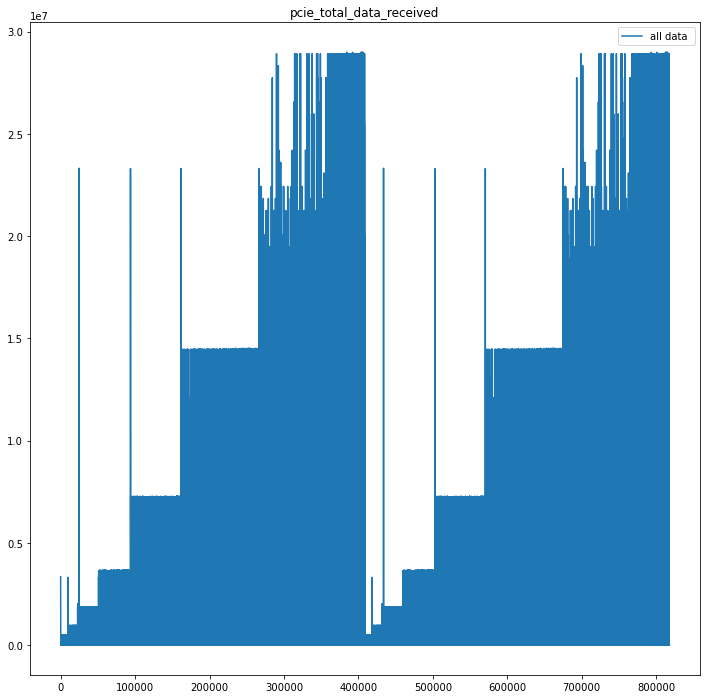

In [14]:
# 提取数据
data1 = df1.iloc[:, 2]
data2 = df2.iloc[:, 2]
data3 = df3.iloc[:, 2]
data4 = df4.iloc[:, 2]
data5 = df5.iloc[:, 2]
data6 = df6.iloc[:, 2]
data7 = df7.iloc[:, 2]
data8 = df1.iloc[:, 2]
data9 = df2.iloc[:, 2]
data10 = df3.iloc[:, 2]
data11 = df4.iloc[:, 2]
data12 = df5.iloc[:, 2]
data13 = df6.iloc[:, 2]
data14 = df7.iloc[:, 2]

all_data = data1.append([data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14], ignore_index=True)


# Plotting all time series data together
plt.figure(figsize=(12, 12))
plt.plot(all_data, label='all data ')
# plt.plot(data2, label='Batchs size: 256, transfer size = 0.765625 MB')
# plt.plot(data3, label='Batchs size: 512, transfer size = 1.53125 MB')
# plt.plot(data4, label='Batchs size: 1024, transfer size = 3.0625 MB')
# plt.plot(data5, label='Batchs size: 2048, transfer size = 6.125 MB')
plt.title('pcie_total_data_received')
plt.legend()
plt.show()


In [15]:
# Parameters
window_size = 100  # size of the window
threshold = 300000  # Threshold for labeling

# Initialize labels with zeros
boundary_labels = np.zeros(len(all_data) - window_size)

# Label windows based on your criteria
for i in range(2300, len(all_data) - window_size):
    if np.any(all_data[i:i+window_size] > threshold):
        boundary_labels[i] = 1

# Create windows
X = np.array([all_data[i:i+window_size] for i in range(len(all_data)-window_size)])


In [16]:
X

array([[3341312,   13312,   12800, ...,   13312,   14848,   13312],
       [  13312,   12800,   13312, ...,   14848,   13312,   12800],
       [  12800,   13312,   12800, ...,   13312,   12800,   13312],
       ...,
       [  13312,   12800,   13312, ...,   12800,   13312,   12800],
       [  12800,   13312,   12800, ...,   13312,   12800,   13312],
       [  13312,   12800,   13312, ...,   12800,   13312,   12800]],
      dtype=int64)

In [17]:
boundary_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
np.savetxt('X.csv', X, delimiter=',')


In [19]:
np.savetxt('boundary_labels.csv', boundary_labels, delimiter=',')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# def extract_features(window):
#     # Example features: mean and standard deviation
#     return [np.mean(window), np.std(window)]

# # Apply feature extraction to each window
# X_features = np.array([extract_features(window) for window in X])

# Prepare the dataset
X_train, X_test, y_train, y_test = train_test_split(X, boundary_labels, test_size=0.2, random_state=42)



# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# LightGBM Classifier
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, num_leaves=31)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)




# Evaluation
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_predictions))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, model_name):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    # ... (Add labels, title, etc.)

# Assuming you have your trained models and test data (X_test, y_test)
# For each model (KNN, XGBoost, LightGBM)

# Predict probabilities for ROC AUC Score
# For KNN, probabilities are calculated differently
# knn_probs = knn_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC Scores
# knn_auc = roc_auc_score(y_test, knn_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
lgbm_auc = roc_auc_score(y_test, lgbm_probs)

# Calculate ROC curves
# knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)

# Plot the ROC curve for each model
plt.figure(figsize=(8, 6))
# plot_roc_curve(knn_fpr, knn_tpr, 'KNN')
plot_roc_curve(xgb_fpr, xgb_tpr, 'XGBoost')
plot_roc_curve(lgbm_fpr, lgbm_tpr, 'LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

# Evaluation reports
for model, name in zip([knn_model, xgb_model, lgbm_model], ["KNN", "XGBoost", "LightGBM"]):
    predictions = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, predictions, digits= 6))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("\n")
